In [7]:
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from functools import partial
import unicodedata 
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import re
from sklearn.ensemble import IsolationForest

In [8]:
df_1 = pd.read_csv(r"D:\tesis_u_sabana\data\secop_2_procesos_1.csv", sep="~")
df_1 = df_1.dropna(subset=['fecha_de_publicacion_del_proceso'])
print(len(df_1))
df_1.head(5)

C:\Users\pipe\AppData\Local\Temp\ipykernel_3524\2015005762.py:1: DtypeWarning: Columns (8,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df_1 = pd.read_csv(r"D:\tesis_u_sabana\data\secop_2_procesos_1.csv", sep="~")


6344984


entidad nit_entidad  \
0                   E.S.E HOSPITAL DIOGENES TRONCOSO   860024030   
1  UNIDAD ADMINISTRATIVA ESPECIAL DE SALUD DE ARAUCA   900034608   
3                  ALCALDÍA DISTRITAL DE SANTA MARTA   891780009   
4                                IGAC Sede Central *   899999004   
5   CAJA DE SUELDOS DE RETIRO DE LA POLICIA NACIONAL   899999073   

         departamento_entidad ciudad_entidad ordenentidad  \
0                Cundinamarca  Puerto Salgar  Territorial   
1                      Arauca    No Definido  Territorial   
3                   Magdalena    Santa Marta  Territorial   
4  Distrito Capital de Bogotá    No Definido     Nacional   
5  Distrito Capital de Bogotá         Bogotá     Nacional   

  entidad_centralizada   id_del_proceso                referencia_del_proceso  \
0      Descentralizada  CO1.REQ.7712925                           CO-054-2025   
1         Centralizada  CO1.REQ.3408112  CM-003-2022 (Presentación de oferta)   
3         Centralizada  CO1.REQ.1970309                            PS520-2021   
4         Centralizada  CO1.REQ.3511740                      CD-CAL-1037-2022   
5      Descentralizada   CO1.REQ.332332                             CDR173-18   

         pci id_del_portafolio  ... nombre_del_proveedor_adjudicado  \
0  704063031  CO1.BDOS.7578121  ...                     No Definido   
1  700587157  CO1.BDOS.3277220  ...        LRAMIREZ CONSULTORES SAS   
3  702354598  CO1.BDOS.1917245  ...     ALBERTO LUIS ANDRADE MERIÑO   
4  700663107  CO1.BDOS.3421207  ...      EDWARD NARCISO ROJAS OLAYA   
5  701177164   CO1.BDOS.324230  ...    Dario Alejandro Marin Orozco   

  nit_del_proveedor_adjudicado codigo_principal_de_categoria  \
0                  No Definido                   V1.80111600   
1                    900843788                   V1.80101500   
3                   1083029933                   V1.80111600   
4                      9729329                   V1.80161501   
5                   1010171941                   V1.80111600   

  estado_de_apertura_del_proceso         tipo_de_contrato subtipo_de_contrato  \
0                        Abierto      Decreto 092 de 2017         No Definido   
1                        Cerrado            Interventoría         No Definido   
3                        Abierto  Prestación de servicios         No Definido   
4                        Abierto  Prestación de servicios         No Definido   
5                        Abierto                     Otro         No Definido   

  categorias_adicionales                                         urlproceso  \
0            No definido  https://community.secop.gov.co/Public/Tenderin...   
1             V180101600  https://community.secop.gov.co/Public/Tenderin...   
3             V180111701  https://community.secop.gov.co/Public/Tenderin...   
4            No definido  https://community.secop.gov.co/Public/Tenderin...   
5            No definido  https://community.secop.gov.co/Public/Tenderin...   

  codigo_entidad          estado_resumen  
0    704063031.0  Presentación de oferta  
1    700587157.0              Adjudicado  
3    702354598.0              Adjudicado  
4    700663107.0              Adjudicado  
5    701177164.0              Adjudicado  

[5 rows x 59 columns]

In [ ]:
df = df_1[df_1["estado_resumen"] == "Adjudicado"]

In [10]:
target_data = df[["precio_base"]]  

iso_forest_column = IsolationForest(n_estimators=100, contamination=0.0005, random_state=23)
outliers_column = iso_forest_column.fit_predict(target_data)

df = df[outliers_column == 1]
print(len(df))

4306044


In [11]:
# Definir las funciones

def eliminar_tildes(texto):
    if not isinstance(texto, str):  # Manejo de valores no str
        return texto
    texto_normalizado = unicodedata.normalize('NFKD', texto)
    texto_sin_tildes = ''.join([c for c in texto_normalizado if not unicodedata.combining(c)])
    return texto_sin_tildes

def lower_1(bagtoprocess):
    if not isinstance(bagtoprocess, str):  # Manejo de valores no str
        return bagtoprocess
    return bagtoprocess.lower()

def limpiar_inicial_dataframe(df):
    return df.map(lambda x: lower_1(eliminar_tildes(x)) if isinstance(x, str) else x)

df = limpiar_inicial_dataframe(df)

In [12]:
df.head(11)

entidad nit_entidad  \
1   unidad administrativa especial de salud de arauca   900034608   
3                   alcaldia distrital de santa marta   891780009   
4                                 igac sede central *   899999004   
5    caja de sueldos de retiro de la policia nacional   899999073   
8                                  icbf sede nacional   899999239   
9                   agencia nacional de tierras - ant   900948953   
10  instituto  distrital de ciencia; biotecnologia...  9010347905   
11                            ministerio del interior   830114475   
13         unidad de salud de ibague  u.s.i. - e.s.e.   809003590   
14       (secretaria distrital de integracion social)  8999990619   
15                                  alcaldia de pasto   891280000   

          departamento_entidad ciudad_entidad ordenentidad  \
1                       arauca    no definido  territorial   
3                    magdalena    santa marta  territorial   
4   distrito capital de bogota    no definido     nacional   
5   distrito capital de bogota         bogota     nacional   
8   distrito capital de bogota    no definido     nacional   
9   distrito capital de bogota         bogota     nacional   
10  distrito capital de bogota         bogota     nacional   
11  distrito capital de bogota         bogota     nacional   
13                      tolima    no definido  territorial   
14  distrito capital de bogota    no definido  territorial   
15                      narino          pasto  territorial   

   entidad_centralizada   id_del_proceso  \
1          centralizada  co1.req.3408112   
3          centralizada  co1.req.1970309   
4          centralizada  co1.req.3511740   
5       descentralizada   co1.req.332332   
8       descentralizada  co1.req.6346835   
9          centralizada  co1.req.6633160   
10      descentralizada  co1.req.4284465   
11         centralizada   co1.req.653872   
13      descentralizada  co1.req.3802485   
14         centralizada   co1.req.778356   
15      descentralizada  co1.req.4649962   

                  referencia_del_proceso        pci id_del_portafolio  ...  \
1   cm-003-2022 (presentacion de oferta)  700587157  co1.bdos.3277220  ...   
3                             ps520-2021  702354598  co1.bdos.1917245  ...   
4                       cd-cal-1037-2022  700663107  co1.bdos.3421207  ...   
5                              cdr173-18  701177164   co1.bdos.324230  ...   
8                icbf-cps-200888-2024sen  700087026  co1.bdos.6223348  ...   
9                       ant-cps-20249402  702066010  co1.bdos.6507623  ...   
10                  idcbis-cps-0469-2023  718450125  co1.bdos.4186843  ...   
11                       ps 2093 de 2018  700583222   co1.bdos.632488  ...   
13                          cto-025-2023  700949019  co1.bdos.3706637  ...   
14                 sdis-dct-092-005-2019  702271321   co1.bdos.756351  ...   
15                          cd-2023-2610  700694094  co1.bdos.4546292  ...   

                      nombre_del_proveedor_adjudicado  \
1                            lramirez consultores sas   
3                         alberto luis andrade merino   
4                          edward narciso rojas olaya   
5                        dario alejandro marin orozco   
8                      victor alberto quinche ramirez   
9                            lisdey talia rueda marin   
10                     laura camila martinez enriquez   
11                          isaac gabriel barros pana   
13                              ada consultores s.a.s   
14  fundacion social para el desarrollo humano fud...   
15                     anita del rosario mora cordoba   

   nit_del_proveedor_adjudicado codigo_principal_de_categoria  \
1                     900843788                   v1.80101500   
3                    1083029933                   v1.80111600   
4                       9729329                   v1.80161501   
5                    1010171941                   v1.80111600

In [13]:
df["duracion_proceso"]=df["duracion"].astype(str) + ' ' +df["unidad_de_duracion"]
df.drop(columns=["duracion","unidad_de_duracion"],inplace=True)

In [14]:
df.head()

entidad nit_entidad  \
1  unidad administrativa especial de salud de arauca   900034608   
3                  alcaldia distrital de santa marta   891780009   
4                                igac sede central *   899999004   
5   caja de sueldos de retiro de la policia nacional   899999073   
8                                 icbf sede nacional   899999239   

         departamento_entidad ciudad_entidad ordenentidad  \
1                      arauca    no definido  territorial   
3                   magdalena    santa marta  territorial   
4  distrito capital de bogota    no definido     nacional   
5  distrito capital de bogota         bogota     nacional   
8  distrito capital de bogota    no definido     nacional   

  entidad_centralizada   id_del_proceso                referencia_del_proceso  \
1         centralizada  co1.req.3408112  cm-003-2022 (presentacion de oferta)   
3         centralizada  co1.req.1970309                            ps520-2021   
4         centralizada  co1.req.3511740                      cd-cal-1037-2022   
5      descentralizada   co1.req.332332                             cdr173-18   
8      descentralizada  co1.req.6346835               icbf-cps-200888-2024sen   

         pci id_del_portafolio  ... nit_del_proveedor_adjudicado  \
1  700587157  co1.bdos.3277220  ...                    900843788   
3  702354598  co1.bdos.1917245  ...                   1083029933   
4  700663107  co1.bdos.3421207  ...                      9729329   
5  701177164   co1.bdos.324230  ...                   1010171941   
8  700087026  co1.bdos.6223348  ...                     79357338   

  codigo_principal_de_categoria estado_de_apertura_del_proceso  \
1                   v1.80101500                        cerrado   
3                   v1.80111600                        abierto   
4                   v1.80161501                        abierto   
5                   v1.80111600                        abierto   
8                   v1.80111600                        abierto   

          tipo_de_contrato subtipo_de_contrato  categorias_adicionales  \
1            interventoria         no definido              v180101600   
3  prestacion de servicios         no definido              v180111701   
4  prestacion de servicios         no definido             no definido   
5                     otro         no definido             no definido   
8  prestacion de servicios         no definido             no definido   

                                          urlproceso  codigo_entidad  \
1  https://community.secop.gov.co/public/tenderin...     700587157.0   
3  https://community.secop.gov.co/public/tenderin...     702354598.0   
4  https://community.secop.gov.co/public/tenderin...     700663107.0   
5  https://community.secop.gov.co/public/tenderin...     701177164.0   
8  https://community.secop.gov.co/public/tenderin...     700087026.0   

   estado_resumen duracion_proceso  
1      adjudicado      5.0 mes(es)  
3      adjudicado      3.0 mes(es)  
4      adjudicado      69.0 dia(s)  
5      adjudicado      7.0 mes(es)  
8      adjudicado     210.0 dia(s)  

[5 rows x 58 columns]

In [15]:
def parse_dates(value):
    """
    Converts various date formats into pandas datetime.
    - Handles MM/DD/YYYY format.
    - Handles MMDDYYYY numeric format.
    - Preserves missing values.
    - Removes any time component if present.
    """
    if pd.isna(value):  
        return None  # Handle missing values
    
    if isinstance(value, pd.Timestamp):  
        return value  # Already a datetime, no need to convert

    try:
        # If value is a string, try to extract and parse MM/DD/YYYY
        if isinstance(value, str):
            # Extract a valid date in MM/DD/YYYY format
            match = re.search(r"\d{1,2}/\d{1,2}/\d{4}", value)
            if match:
                return pd.to_datetime(match.group(), format="%m/%d/%Y", errors="coerce")

        # If the value is numeric and follows MMDDYYYY format
        elif isinstance(value, (int, float)):
            value_str = str(int(value)).zfill(8)  # Ensure it's 8 digits
            return pd.to_datetime(value_str, format="%m%d%Y", errors="coerce")

        return None  # Return None if it doesn't match expected formats

    except (ValueError, TypeError):
        return None  # Handle any parsing errors gracefully

# --- Apply only to date columns ---

# List the columns that contain dates
date_columns = [
    "fecha_de_publicacion_del_proceso", 
    "fecha_de_ultima_publicación",
    "fecha_de_publicacion_fase_planeacion_precalificacion",
    "fecha_de_publicacion_fase_seleccion_precalificacion",
    "fecha_de_publicacion_manifestacion_de_interes",
    "fecha_de_publicacion_fase_borrador",
    "fecha_de_publicacion_fase_seleccion",
    "fecha_de_recepcion_de_respuestas",
    "fecha_de_apertura_de_respuesta",
    "fecha_de_apertura_efectiva",
    "fecha_adjudicacion"
]

# Apply function only to date columns
df[date_columns] = df[date_columns].map(parse_dates)

In [16]:
def convertir_a_dias(valor):
    if isinstance(valor, str):
        # Buscar número en la cadena
        match = re.search(r'(\d+)', valor)
        if match:
            numero = int(match.group(1))
            # Convertir meses a días
            if "mes" in valor:
                return numero * 30  # Asumiendo 1 mes = 30 días
            return numero  # Si ya está en días, devolverlo como está
    return None  # Para valores no válidos

# Aplicar la función a la columna
df["duracion_en_dias"] = df["duracion_proceso"].apply(convertir_a_dias)

In [17]:
df.head()

entidad nit_entidad  \
1  unidad administrativa especial de salud de arauca   900034608   
3                  alcaldia distrital de santa marta   891780009   
4                                igac sede central *   899999004   
5   caja de sueldos de retiro de la policia nacional   899999073   
8                                 icbf sede nacional   899999239   

         departamento_entidad ciudad_entidad ordenentidad  \
1                      arauca    no definido  territorial   
3                   magdalena    santa marta  territorial   
4  distrito capital de bogota    no definido     nacional   
5  distrito capital de bogota         bogota     nacional   
8  distrito capital de bogota    no definido     nacional   

  entidad_centralizada   id_del_proceso                referencia_del_proceso  \
1         centralizada  co1.req.3408112  cm-003-2022 (presentacion de oferta)   
3         centralizada  co1.req.1970309                            ps520-2021   
4         centralizada  co1.req.3511740                      cd-cal-1037-2022   
5      descentralizada   co1.req.332332                             cdr173-18   
8      descentralizada  co1.req.6346835               icbf-cps-200888-2024sen   

         pci id_del_portafolio  ... codigo_principal_de_categoria  \
1  700587157  co1.bdos.3277220  ...                   v1.80101500   
3  702354598  co1.bdos.1917245  ...                   v1.80111600   
4  700663107  co1.bdos.3421207  ...                   v1.80161501   
5  701177164   co1.bdos.324230  ...                   v1.80111600   
8  700087026  co1.bdos.6223348  ...                   v1.80111600   

  estado_de_apertura_del_proceso         tipo_de_contrato subtipo_de_contrato  \
1                        cerrado            interventoria         no definido   
3                        abierto  prestacion de servicios         no definido   
4                        abierto  prestacion de servicios         no definido   
5                        abierto                     otro         no definido   
8                        abierto  prestacion de servicios         no definido   

  categorias_adicionales                                         urlproceso  \
1             v180101600  https://community.secop.gov.co/public/tenderin...   
3             v180111701  https://community.secop.gov.co/public/tenderin...   
4            no definido  https://community.secop.gov.co/public/tenderin...   
5            no definido  https://community.secop.gov.co/public/tenderin...   
8            no definido  https://community.secop.gov.co/public/tenderin...   

  codigo_entidad estado_resumen duracion_proceso duracion_en_dias  
1    700587157.0     adjudicado      5.0 mes(es)              150  
3    702354598.0     adjudicado      3.0 mes(es)               90  
4    700663107.0     adjudicado      69.0 dia(s)               69  
5    701177164.0     adjudicado      7.0 mes(es)              210  
8    700087026.0     adjudicado     210.0 dia(s)              210  

[5 rows x 59 columns]

In [18]:
tokenizer = RegexpTokenizer(r'\w+')

In [19]:
spanish_stopwords = set(stopwords.words('spanish'))
english_stopwords = set(stopwords.words('english'))
other_stopwords = set(["he" , "mas", "si","ser","aunque","hace","tan","solo",
                       "tambien","vez","parece","va","da","hacer","asi","haber",
                       "pues","ver","etc","contrato","servicios","prestacion",
                       "mediante","cuenta","fecha","presente","acuerdo","necesario","contratista",
                        "mil","servicio","requiere","contratos", "supervisor","cumplimiento","modificar",
                        "dar","realizar","objeto","contractual","pesos","modificacion",
                        "conforme","contratacion","gestion","entidad","apoyo","ejecucion",
                        "vigente","normatividad","acta","prestar","desarrollo","profesionales",
                        "actividades","desarrollo","procesos","marco","legal","prestacion", "especificaciones",
                        ])
stopword_set = spanish_stopwords.union(english_stopwords,other_stopwords)

In [20]:
def extract_reviews(bagtoprocess):
    if not isinstance(bagtoprocess, str):  # Manejo de valores no str
        return ""
    return bagtoprocess.lower()

def checkif_stopword(word, stopwords):
    return word not in stopwords

def filter_stopwords(tokens, stopwords):
    return list(filter(partial(checkif_stopword, stopwords=stopwords), tokens))

def eliminar_tildes(texto):
    if not isinstance(texto, str):  # Manejo de valores no str
        return ""
    texto_normalizado = unicodedata.normalize('NFKD', texto)
    texto_sin_tildes = ''.join([c for c in texto_normalizado if not unicodedata.combining(c)])
    return texto_sin_tildes

def eliminar_numeros(texto):
    if not isinstance(texto, str):  # Manejo de valores no str
        return ""
    return ''.join([c for c in texto if not c.isdigit()])

In [21]:
df['nombre_del_procedimiento'] = df['nombre_del_procedimiento'].astype(str)  # Asegurar que todo es string
df['nombre_del_procedimiento_sin_numeros'] = df['nombre_del_procedimiento'].apply(eliminar_numeros)
df['nombre_del_procedimiento_tokens'] = df['nombre_del_procedimiento_sin_numeros'].apply(tokenizer.tokenize)
df['nombre_del_procedimiento_limpio'] = df['nombre_del_procedimiento_tokens'].apply(partial(filter_stopwords, stopwords=stopword_set))

df['descripción_del_procedimiento'] = df['descripción_del_procedimiento'].astype(str)  # Asegurar que todo es string
df['descripción_del_procedimiento_sin_numeros'] = df['descripción_del_procedimiento'].apply(eliminar_numeros)
df['descripción_del_procedimiento_tokens'] = df['descripción_del_procedimiento_sin_numeros'].apply(tokenizer.tokenize)
df['descripción_del_procedimiento_limpio'] = df['descripción_del_procedimiento_tokens'].apply(partial(filter_stopwords, stopwords=stopword_set))
df.head()

entidad nit_entidad  \
1  unidad administrativa especial de salud de arauca   900034608   
3                  alcaldia distrital de santa marta   891780009   
4                                igac sede central *   899999004   
5   caja de sueldos de retiro de la policia nacional   899999073   
8                                 icbf sede nacional   899999239   

         departamento_entidad ciudad_entidad ordenentidad  \
1                      arauca    no definido  territorial   
3                   magdalena    santa marta  territorial   
4  distrito capital de bogota    no definido     nacional   
5  distrito capital de bogota         bogota     nacional   
8  distrito capital de bogota    no definido     nacional   

  entidad_centralizada   id_del_proceso                referencia_del_proceso  \
1         centralizada  co1.req.3408112  cm-003-2022 (presentacion de oferta)   
3         centralizada  co1.req.1970309                            ps520-2021   
4         centralizada  co1.req.3511740                      cd-cal-1037-2022   
5      descentralizada   co1.req.332332                             cdr173-18   
8      descentralizada  co1.req.6346835               icbf-cps-200888-2024sen   

         pci id_del_portafolio  ... codigo_entidad estado_resumen  \
1  700587157  co1.bdos.3277220  ...    700587157.0     adjudicado   
3  702354598  co1.bdos.1917245  ...    702354598.0     adjudicado   
4  700663107  co1.bdos.3421207  ...    700663107.0     adjudicado   
5  701177164   co1.bdos.324230  ...    701177164.0     adjudicado   
8  700087026  co1.bdos.6223348  ...    700087026.0     adjudicado   

  duracion_proceso duracion_en_dias  \
1      5.0 mes(es)              150   
3      3.0 mes(es)               90   
4      69.0 dia(s)               69   
5      7.0 mes(es)              210   
8     210.0 dia(s)              210   

                nombre_del_procedimiento_sin_numeros  \
1  interventoria tecnica; administrativa y financ...   
3                            prestacion de servicios   
4  prestacion de servicios personales para realiz...   
5  prestacion de servicios profesionales en mater...   
8              prestacion de servicios profesionales   

                     nombre_del_procedimiento_tokens  \
1  [interventoria, tecnica, administrativa, y, fi...   
3                        [prestacion, de, servicios]   
4  [prestacion, de, servicios, personales, para, ...   
5  [prestacion, de, servicios, profesionales, en,...   
8         [prestacion, de, servicios, profesionales]   

                     nombre_del_procedimiento_limpio  \
1  [interventoria, tecnica, administrativa, finan...   
3                                                 []   
4  [personales, control, verificacion, tramites, ...   
5                            [materia, arquitectura]   
8                                                 []   

           descripción_del_procedimiento_sin_numeros  \
1  interventoria tecnica; administrativa y financ...   
3  prestacion de servicios asistenciales para el ...   
4  prestacion de servicios personales para realiz...   
5  prestacion de servicios profesionales en mater...   
8  prestar servicios profesionales en la subdirec...   

                descripción_del_procedimiento_tokens  \
1  [interventoria, tecnica, administrativa, y, fi...   
3  [prestacion, de, servicios, asistenciales, par...   
4  [prestacion, de, servicios, personales, para, ...   
5  [prestacion, de, servicios, profesionales, en,...   
8  [prestar, servicios, profesionales, en, la, su...   

                descripción_del_procedimiento_limpio  
1  [interventoria, tecnica, administrativa, finan...  
3  [asistenciales, atencion, integral, poblacion,...  
4  [personales, control, verificacion, tramites, ...  
5  [materia, arquitectura, tecnico, control, segu...  
8  [subdireccion, monitoreo, evaluacion, componen...  

[5 rows x 65 columns]

In [22]:
def get_top_n_words(corpus, n=1, k=1, stop_words=None):
   vec = CountVectorizer(ngram_range=(k, k), stop_words=stop_words)
   bag_of_words = vec.fit_transform(corpus)
   sum_words = bag_of_words.sum(axis=0) 
   words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
   words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
   return words_freq[:n]

common_words = get_top_n_words(df['nombre_del_procedimiento_limpio'].apply(lambda x: ' '.join(x)), 20, 1, stop_words=list(stopword_set))

presentacion 202437
municipio 192680
secretaria 190615
oferta 188062
salud 163339
suministro 156819
apoyar 145910
mantenimiento 122575
atencion 114161
profesional 113513
contratar 105425
direccion 105268
proyecto 97874
adquisicion 97560
nacional 93292
seguimiento 90440
proceso 90352
informacion 89538
fortalecimiento 88093
programa 83019


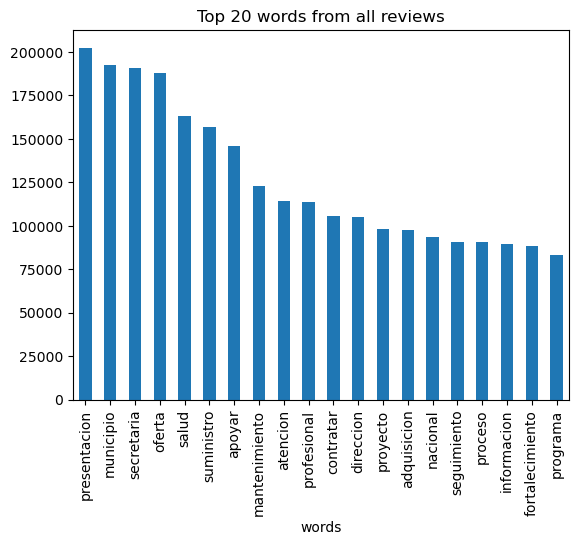

In [23]:
for word, freq in common_words:
    print(word, freq)
    
df_top_words = pd.DataFrame(common_words, columns=["words", "count"])
df_top_words.groupby("words").sum()["count"].sort_values(ascending=False).plot(
    kind="bar", title="Top 20 words from all reviews"
)
plt.show()

In [24]:
df.columns

Index(['entidad', 'nit_entidad', 'departamento_entidad', 'ciudad_entidad',
       'ordenentidad', 'entidad_centralizada', 'id_del_proceso',
       'referencia_del_proceso', 'pci', 'id_del_portafolio',
       'nombre_del_procedimiento', 'descripción_del_procedimiento', 'fase',
       'fecha_de_publicacion_del_proceso', 'fecha_de_ultima_publicación',
       'fecha_de_publicacion_fase_planeacion_precalificacion',
       'fecha_de_publicacion_fase_seleccion_precalificacion',
       'fecha_de_publicacion_manifestacion_de_interes',
       'fecha_de_publicacion_fase_borrador',
       'fecha_de_publicacion_fase_seleccion', 'precio_base',
       'modalidad_de_contratacion', 'justificación_modalidad_de_contratación',
       'fecha_de_recepcion_de_respuestas', 'fecha_de_apertura_de_respuesta',
       'fecha_de_apertura_efectiva', 'ciudad_de_la_unidad_de_contratación',
       'nombre_de_la_unidad_de_contratación', 'proveedores_invitados',
       'proveedores_con_invitacion_directa',
       'visual

In [ ]:
# Save directly to CSV
df.to_csv(r"D:\tesis_u_sabana\data\secop_2_procesos_1_clean.csv", sep="~", index=False)

In [27]:
df.head(10)

entidad nit_entidad  \
1   unidad administrativa especial de salud de arauca   900034608   
3                   alcaldia distrital de santa marta   891780009   
4                                 igac sede central *   899999004   
5    caja de sueldos de retiro de la policia nacional   899999073   
8                                  icbf sede nacional   899999239   
9                   agencia nacional de tierras - ant   900948953   
10  instituto  distrital de ciencia; biotecnologia...  9010347905   
11                            ministerio del interior   830114475   
13         unidad de salud de ibague  u.s.i. - e.s.e.   809003590   
14       (secretaria distrital de integracion social)  8999990619   

          departamento_entidad ciudad_entidad ordenentidad  \
1                       arauca    no definido  territorial   
3                    magdalena    santa marta  territorial   
4   distrito capital de bogota    no definido     nacional   
5   distrito capital de bogota         bogota     nacional   
8   distrito capital de bogota    no definido     nacional   
9   distrito capital de bogota         bogota     nacional   
10  distrito capital de bogota         bogota     nacional   
11  distrito capital de bogota         bogota     nacional   
13                      tolima    no definido  territorial   
14  distrito capital de bogota    no definido  territorial   

   entidad_centralizada   id_del_proceso  \
1          centralizada  co1.req.3408112   
3          centralizada  co1.req.1970309   
4          centralizada  co1.req.3511740   
5       descentralizada   co1.req.332332   
8       descentralizada  co1.req.6346835   
9          centralizada  co1.req.6633160   
10      descentralizada  co1.req.4284465   
11         centralizada   co1.req.653872   
13      descentralizada  co1.req.3802485   
14         centralizada   co1.req.778356   

                  referencia_del_proceso        pci id_del_portafolio  ...  \
1   cm-003-2022 (presentacion de oferta)  700587157  co1.bdos.3277220  ...   
3                             ps520-2021  702354598  co1.bdos.1917245  ...   
4                       cd-cal-1037-2022  700663107  co1.bdos.3421207  ...   
5                              cdr173-18  701177164   co1.bdos.324230  ...   
8                icbf-cps-200888-2024sen  700087026  co1.bdos.6223348  ...   
9                       ant-cps-20249402  702066010  co1.bdos.6507623  ...   
10                  idcbis-cps-0469-2023  718450125  co1.bdos.4186843  ...   
11                       ps 2093 de 2018  700583222   co1.bdos.632488  ...   
13                          cto-025-2023  700949019  co1.bdos.3706637  ...   
14                 sdis-dct-092-005-2019  702271321   co1.bdos.756351  ...   

   codigo_entidad estado_resumen duracion_proceso duracion_en_dias  \
1     700587157.0     adjudicado      5.0 mes(es)              150   
3     702354598.0     adjudicado      3.0 mes(es)               90   
4     700663107.0     adjudicado      69.0 dia(s)               69   
5     701177164.0     adjudicado      7.0 mes(es)              210   
8     700087026.0     adjudicado     210.0 dia(s)              210   
9     702066010.0     adjudicado      5.0 mes(es)              150   
10    718450125.0     adjudicado      76.0 dia(s)               76   
11    700583222.0     adjudicado      19.0 dia(s)               19   
13    700949019.0     adjudicado      4.0 mes(es)              120   
14    702271321.0     adjudicado      8.0 mes(es)              240   

                 nombre_del_procedimiento_sin_numeros  \
1   interventoria tecnica; administrativa y financ...   
3                             prestacion de servicios   
4   prestacion de servicios personales para realiz...   
5   prestacion de servicios profesionales en mater...   
8               prestacion de servicios profesionales   
9   prestacion de servicios profesionales y/o apoy...   
10  prestar servicios profesionales para fortalece...   
11                          isaa